In [ ]:
!pip install lightgbm
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
file_path='/content/drive/MyDrive/combined_wind_farm_A_data_new.csv'
data=pd.read_csv(file_path, delimiter=',', encoding='utf-8', on_bad_lines='skip')
print("File loaded successfully!")

File loaded successfully!


In [ ]:
data['status_type_id'] = data['status_type_id'].map({0:0, 5:1, 3:2, 4:3}).astype(int)

print(data['status_type_id'].value_counts())

status_type_id
0    898672
1    260387
2     23689
3     13999
Name: count, dtype: int64


In [ ]:
data['event_label'] = data['event_label'].map({'normal': 0, 'anomaly': 1}).astype(int)

print(data['event_label'].value_counts())

event_label
0    601394
1    595353
Name: count, dtype: int64


In [ ]:
data.columns

Index(['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id',
       'sensor_0_avg', 'sensor_1_avg', 'sensor_2_avg', 'wind_speed_3_avg',
       'wind_speed_4_avg', 'wind_speed_3_max', 'wind_speed_3_min',
       'wind_speed_3_std', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min',
       'sensor_5_std', 'sensor_6_avg', 'sensor_7_avg', 'sensor_8_avg',
       'sensor_9_avg', 'sensor_10_avg', 'sensor_11_avg', 'sensor_12_avg',
       'sensor_13_avg', 'sensor_14_avg', 'sensor_15_avg', 'sensor_16_avg',
       'sensor_17_avg', 'sensor_18_avg', 'sensor_18_max', 'sensor_18_min',
       'sensor_18_std', 'sensor_19_avg', 'sensor_20_avg', 'sensor_21_avg',
       'sensor_22_avg', 'sensor_23_avg', 'sensor_24_avg', 'sensor_25_avg',
       'sensor_26_avg', 'reactive_power_27_avg', 'reactive_power_27_max',
       'reactive_power_27_min', 'reactive_power_27_std',
       'reactive_power_28_avg', 'reactive_power_28_max',
       'reactive_power_28_min', 'reactive_power_28_std', 'power_29_avg',
      

In [ ]:
#Renaming the columns
rename_mapping = {
    'time_stamp': 'time_stamp',
    'asset_id': 'asset_id',
    'id': 'id',
    'train_test': 'train_test',
    'status_type_id': 'status_type_id',
    'sensor_0_avg': 'Ambient temperature avg',
    'sensor_1_avg': 'Wind absolute direction avg',
    'sensor_2_avg': 'Wind relative direction avg',
    'wind_speed_3_avg': 'Windspeed avg',
    'wind_speed_4_avg': 'Estimated windspeed avg',
    'wind_speed_3_max': 'Windspeed max',
    'wind_speed_3_min': 'Windspeed min',
    'wind_speed_3_std': 'Windspeed std',
    'sensor_5_avg': 'Pitch angle avg',
    'sensor_5_max': 'Pitch angle max',
    'sensor_5_min': 'Pitch angle min',
    'sensor_5_std': 'Pitch angle std',
    'sensor_6_avg': 'Hub controller temperature avg',
    'sensor_7_avg': 'Top nacelle controller temperature avg',
    'sensor_8_avg': 'Choke coils on the VCS- section temperature avg',
    'sensor_9_avg': 'VCP-board temperature avg',
    'sensor_10_avg': 'VCS cooling water temperature avg',
    'sensor_11_avg': 'Gearbox bearing on high speed shaft  temperature avg',
    'sensor_12_avg': 'Gearbox oil temperature avg',
    'sensor_13_avg': 'Generator bearing 2(Drive end)  temperature avg',
    'sensor_14_avg': 'Generator bearing 1(Non-drive end) temperature avg',
    'sensor_15_avg': 'Generator stator winding phase 1 temperature avg',
    'sensor_16_avg': 'Generator stator winding phase 2 temperature avg',
    'sensor_17_avg': 'Generator stator winding phase 3 temperature avg',
    'sensor_18_avg': 'Generator rpm avg',
    'sensor_18_max': 'Generator rpm max',
    'sensor_18_min': 'Generator rpm min',
    'sensor_18_std': 'Generator rpm std',
    'sensor_19_avg': 'Split ring chamber temperature avg',
    'sensor_20_avg': 'Busbar section temperature avg',
    'sensor_21_avg': 'IGBT-driver on grid side inverter temperature avg',
    'sensor_22_avg': 'Actual Phase displacement avg',
    'sensor_23_avg': 'Averaged current phase 1',
    'sensor_24_avg': 'Averaged current phase 2',
    'sensor_25_avg': 'Averaged current phase 3',
    'sensor_26_avg': 'Grid frequency',
    'reactive_power_27_avg': 'Possible Grid capacitive reactive power avg',
    'reactive_power_27_max': 'Possible Grid capacitive reactive power max',
    'reactive_power_27_min': 'Possible Grid capacitive reactive power min',
    'reactive_power_27_std': 'Possible Grid capacitive reactive power std',
    'reactive_power_28_avg': 'Possible Grid inductive reactive power avg',
    'reactive_power_28_max': 'Possible Grid inductive reactive power max',
    'reactive_power_28_min': 'Possible Grid inductive reactive power min',
    'reactive_power_28_std': 'Possible Grid inductive reactive power std',
    'power_29_avg': 'Possible Grid active power avg',
    'power_29_max': 'Possible Grid active power max',
    'power_29_min': 'Possible Grid active power min',
    'power_29_std': 'Possible Grid active power std',
    'power_30_avg': 'Grid power avg',
    'power_30_max': 'Grid power max',
    'power_30_min': 'Grid power min',
    'power_30_std': 'Grid power std',
    'sensor_31_avg': 'Grid reactive power avg',
    'sensor_31_max': 'Grid reactive power max',
    'sensor_31_min': 'Grid reactive power min',
    'sensor_31_std': 'Grid reactive power std',
    'sensor_32_avg': 'Averaged voltage phase 1',
    'sensor_33_avg': 'Averaged voltage phase 2',
    'sensor_34_avg': 'Averaged voltage phase 3',
    'sensor_35_avg': 'IGBT-driver on rotor side inverter phase 1 temperature avg',
    'sensor_36_avg': 'IGBT-driver on rotor side inverter phase 2 temperature avg',
    'sensor_37_avg': 'IGBT-driver on rotor side inverter phase 3 temperature avg',
    'sensor_38_avg': 'HV transformer phase L1 temperature avg',
    'sensor_39_avg': 'HV transformer phase L2 temperature avg',
    'sensor_40_avg': 'HV transformer phase L3 temperature avg',
    'sensor_41_avg': 'Hydraulic group oil temperature avg',
    'sensor_42_avg': 'Nacelle direction avg',
    'sensor_43_avg': 'Nacelle temperature avg',
    'sensor_44': 'Generator disconnected active power avg',
    'sensor_45': 'Generator connected in delta active power avg',
    'sensor_46': 'Generator connected in star active power avg',
    'sensor_47': 'Generator disconnected reactive power avg',
    'sensor_48': 'Generator connected in delta reactive power avg',
    'sensor_49': 'Generator connected in star reactive power avg',
    'sensor_50': 'Total active power avg',
    'sensor_51': 'Total reactive power avg',
    'sensor_52_avg': 'Rotor rpm avg',
    'sensor_52_max': 'Rotor rpm max',
    'sensor_52_min': 'Rotor rpm min',
    'sensor_52_std': 'Rotor rpm std',
    'sensor_53_avg': 'Nose cone temperature avg',
}

# Rename the columns in the DataFrame
data.rename(columns=rename_mapping, inplace=True)
# Convert time to python date time format
data['time_stamp']=pd.to_datetime(data['time_stamp'])
#Converting object dtypes to strings
data=data.astype({col: 'string' for col in data.select_dtypes(include='object').columns})

In [ ]:
#Removing categorical and non-numeric columns
input_data = data.drop(['id', 'train_test', 'event_description', 'time_stamp'], axis=1)

In [ ]:
#Handling missing values
input_data=input_data.dropna()
data=data.dropna()
missing_data=data.isnull().sum()
missing_values=input_data.isnull().sum()
print("Missing values: \n", missing_data[missing_data>0])
print("Missing values: \n", missing_values[missing_values>0])

Missing values: 
 Series([], dtype: int64)
Missing values: 
 Series([], dtype: int64)


In [ ]:
print(input_data.describe())
print(input_data.info())

           asset_id  status_type_id  Ambient temperature avg  \
count  1.196727e+06    1.196727e+06             1.196727e+06   
mean   1.042950e+01    2.922563e-01             1.995071e+01   
std    6.796302e+00    5.626890e-01             5.555662e+00   
min    0.000000e+00    0.000000e+00             4.000000e+00   
25%    1.000000e+01    0.000000e+00             1.600000e+01   
50%    1.100000e+01    0.000000e+00             1.900000e+01   
75%    1.300000e+01    0.000000e+00             2.400000e+01   
max    2.100000e+01    3.000000e+00             4.100000e+01   

       Wind absolute direction avg  Wind relative direction avg  \
count                 1.196727e+06                 1.196727e+06   
mean                  1.708521e+02                 1.269287e-01   
std                   9.258910e+01                 3.276395e+01   
min                   0.000000e+00                -1.800000e+02   
25%                   9.790000e+01                -9.700000e+00   
50%                  

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 2: Separate features and target
X = input_data.drop(columns=['status_type_id', 'event_id', 'asset_id'])  # Drop irrelevant columns
y = input_data['status_type_id']  # Target variable

# Step 3: Standardize the data (important before applying PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Step 4: Apply PCA for dimensionality reduction
# pca = PCA(n_components=50)  # You can adjust the number of components
# X_pca = pca.fit_transform(X_scaled)

# Step 5: Dataset-based split (split by event_id)
# We will split based on event_id, not random rows
train_datasets, test_datasets = train_test_split(input_data['event_id'].unique(), test_size=0.2, random_state=42)

# Step 6: Split the data based on event_id
train_data = input_data[input_data['event_id'].isin(train_datasets)]
test_data = input_data[input_data['event_id'].isin(test_datasets)]

# Features (X) and target (y) for train and test data after PCA transformation
X_train = X_scaled[input_data['event_id'].isin(train_datasets)]
y_train = train_data['status_type_id']

X_test = X_scaled[input_data['event_id'].isin(test_datasets)]
y_test = test_data['status_type_id']

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 2: Select the specified features
unique_features = [
    'status_type_id', 'Generator rpm avg', 'Generator rpm max', 'Ambient temperature avg',
    'Split ring chamber temperature avg', 'Pitch angle avg',
    'IGBT-driver on grid side inverter temperature avg', 'Pitch angle min',
    'Generator stator winding phase 2 temperature avg', 'Windspeed std',
    'Generator bearing 1(Non-drive end) temperature avg', 'Busbar section temperature avg',
    'Actual Phase displacement avg', 'Hub controller temperature avg', 'VCP-board temperature avg',
    'Total active power avg', 'Averaged current phase 2', 'Windspeed avg',
    'Averaged current phase 3', 'Top nacelle controller temperature avg',
    'Estimated windspeed avg', 'Gearbox oil temperature avg',
    'Generator stator winding phase 1 temperature avg', 'Generator bearing 2(Drive end)  temperature avg',
    'Choke coils on the VCS- section temperature avg', 'Pitch angle max',
    'Possible Grid capacitive reactive power avg', 'Averaged current phase 1',
    'Windspeed min', 'VCS cooling water temperature avg'
]
unique_data = input_data[unique_features]

# Step 3: Separate features and target
X = unique_data.drop(columns=['status_type_id'])  # Exclude target variable from features
y = unique_data['status_type_id']  # Target variable

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive Bayes Accuracy: 0.7754380687373091
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85    179733
           1       0.53      0.88      0.66     52075
           2       0.16      0.18      0.17      4738
           3       0.01      0.01      0.01      2800

    accuracy                           0.78    239346
   macro avg       0.41      0.46      0.42    239346
weighted avg       0.83      0.78      0.79    239346



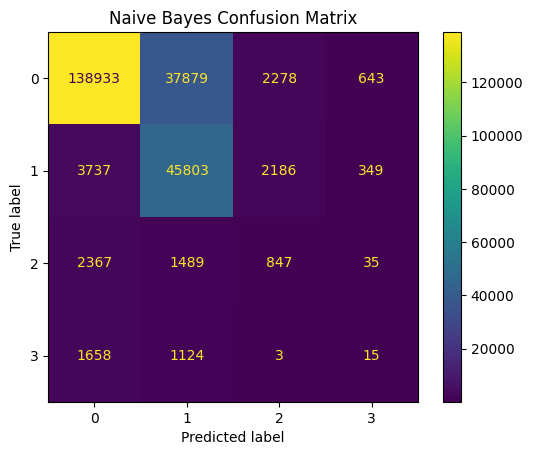

Decision Tree Accuracy: 0.9719778061885304
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    179733
           1       0.94      0.95      0.94     52075
           2       0.92      0.92      0.92      4738
           3       0.87      0.84      0.86      2800

    accuracy                           0.97    239346
   macro avg       0.93      0.92      0.93    239346
weighted avg       0.97      0.97      0.97    239346



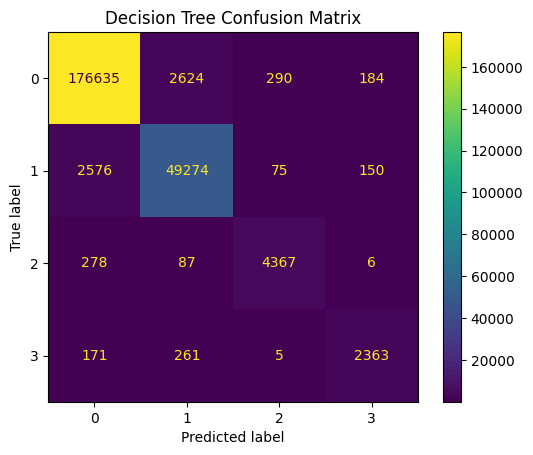

XGBoost Accuracy: 0.9375924393973578
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    179733
           1       0.89      0.92      0.91     52075
           2       0.90      0.21      0.33      4738
           3       0.33      0.00      0.01      2800

    accuracy                           0.94    239346
   macro avg       0.77      0.53      0.55    239346
weighted avg       0.93      0.94      0.93    239346



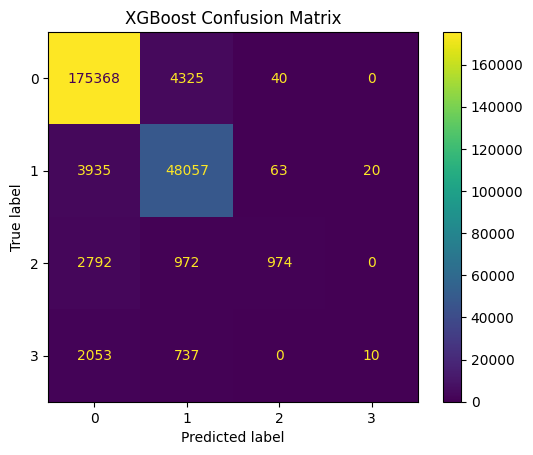

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.295229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4097
[LightGBM] [Info] Number of data points in the train set: 957381, number of used features: 29
[LightGBM] [Info] Start training from score -0.286437
[LightGBM] [Info] Start training from score -1.525217
[LightGBM] [Info] Start training from score -3.922345
[LightGBM] [Info] Start training from score -4.448377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

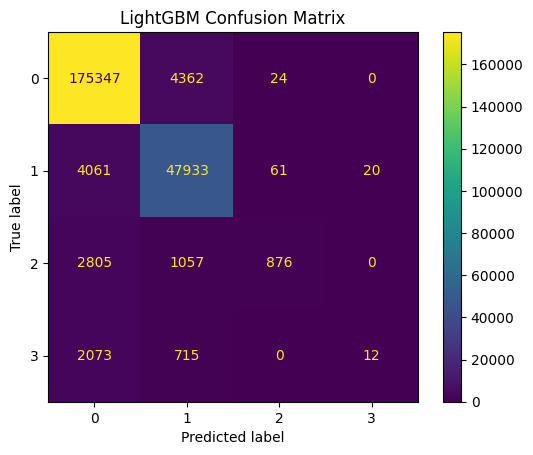

In [ ]:
# Step 7: Train a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()


# Step 7: Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred_dt = dt_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Step 7: Train an XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("XGBoost Confusion Matrix")
plt.show()


# Step 7: Train a LightGBM model
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=3, n_estimators=50, random_state=42)
lgbm_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm}")
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
ConfusionMatrixDisplay(cm_lgbm).plot()
plt.title("LightGBM Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8025995838660349
Logistic Regression Accuracy: 0.9365855288995847
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    179733
           1       0.89      0.92      0.90     52075
           2       0.91      0.18      0.31      4738
           3       0.38      0.00      0.01      2800

    accuracy                           0.94    239346
   macro avg       0.78      0.52      0.55    239346
weighted avg       0.93      0.94      0.93    239346



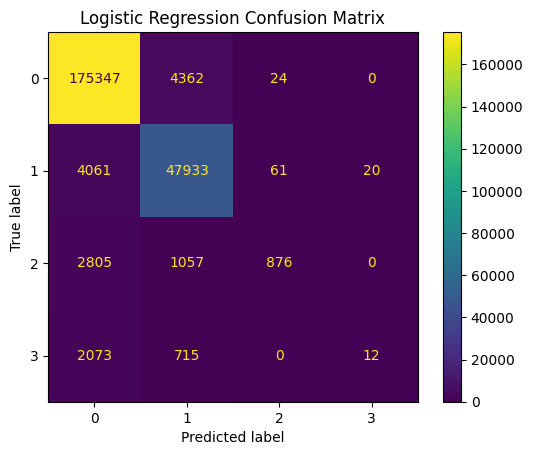

In [ ]:
# Step 7: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Step 9: Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Logistic Regression Accuracy: {accuracy_lgbm}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
ConfusionMatrixDisplay(cm_lgbm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.8794 - loss: -45.4360 - val_accuracy: 0.8862 - val_loss: -745.2150
Epoch 2/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.8462 - loss: -1523.7371 - val_accuracy: 0.8135 - val_loss: -5552.1694
Epoch 3/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.8317 - loss: -8028.0410 - val_accuracy: 0.8657 - val_loss: -18217.0820
Epoch 4/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.8311 - loss: -21423.8730 - val_accuracy: 0.8702 - val_loss: -42348.8555
Epoch 5/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.8274 - loss: -47438.0664 - val_accuracy: 0.8062 - val_loss: -81788.2109
Epoch 6/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.8305 - loss: -92099.4219 - val_accuracy: 0.8579 - val_loss: -140585.8125
Epoch 7/10
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.8321 - loss: -157790.5312 - val_accuracy: 0.7976 - val_loss: -223406.6562
Epoc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


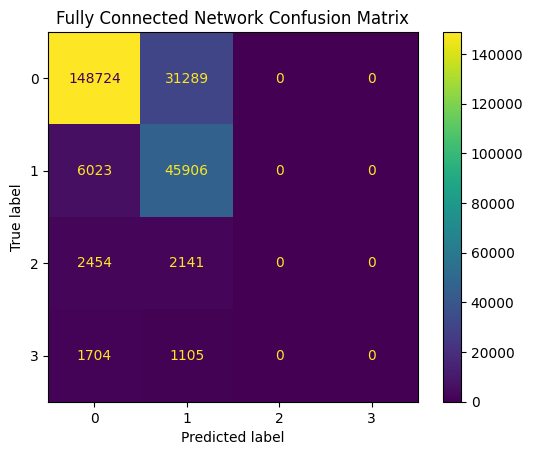

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your features and labels (replace with your actual dataset)
# Example: X = np.random.rand(1000, 29)  # 1000 samples, 29 features per sample
# Example: y = np.random.randint(0, 2, size=1000)  # Binary labels

# Step 1: Split your dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Fully Connected Neural Network model
fc_model = Sequential()

# Add an input layer (first hidden layer)
fc_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # 64 neurons

# Add another hidden layer
fc_model.add(Dense(32, activation='relu'))  # 32 neurons

# Add an output layer
fc_model.add(Dense(1, activation='sigmoid'))  # Binary classification (change activation if multiclass)

# Step 4: Compile the model
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
fc_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Step 6: Evaluate the model
y_pred_fc = fc_model.predict(X_test_scaled)
y_pred_fc = (y_pred_fc > 0.5).astype(int)  # Threshold to get binary predictions

# Accuracy and Classification Report
accuracy_fc = np.mean(y_pred_fc == y_test.values.reshape(-1, 1))  # Accuracy calculation
print(f"Fully Connected Network Accuracy: {accuracy_fc}")
print("Fully Connected Network Classification Report:\n", classification_report(y_test, y_pred_fc))

# Confusion Matrix
cm_fc = confusion_matrix(y_test, y_pred_fc)
ConfusionMatrixDisplay(cm_fc).plot()
plt.title("Fully Connected Network Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.8982 - loss: 0.3516 - val_accuracy: 0.9210 - val_loss: 0.2745
Epoch 2/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.9209 - loss: 0.2751 - val_accuracy: 0.9248 - val_loss: 0.2568
Epoch 3/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.9241 - loss: 0.2612 - val_accuracy: 0.9286 - val_loss: 0.2456
Epoch 4/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.9247 - loss: 0.2557 - val_accuracy: 0.9216 - val_loss: 0.2440
Epoch 5/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - accuracy: 0.9265 - loss: 0.2476 - val_accuracy: 0.9294 - val_loss: 0.2330
Epoch 6/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9278 - loss: 0.2427 - val_accuracy: 0.9296 - val_loss: 0.2287
Epoch 7/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9283 - loss: 0.2391 - val_accuracy: 0.9300 - val_loss: 0.2264
Epoch 8/10
23935/23935 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 

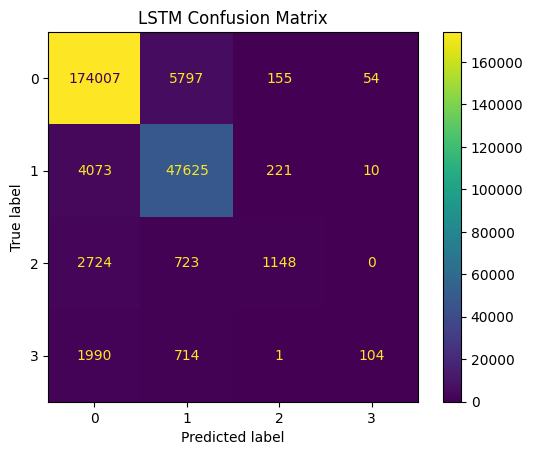

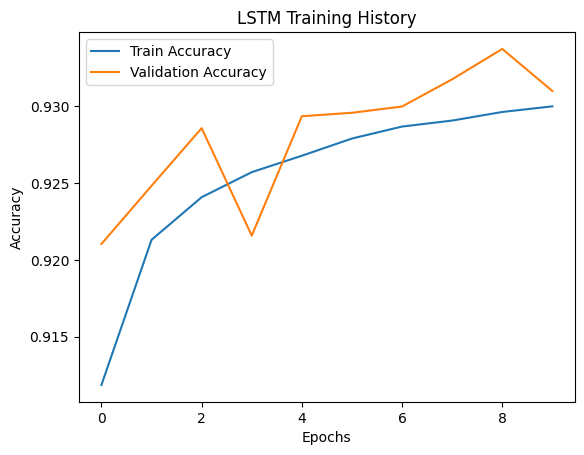

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Reshape the data for LSTM
# LSTM expects 3D input: (samples, timesteps, features)
timesteps = 1  # Each sample is treated as a single timestep
num_features = X_train_scaled.shape[1]

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, num_features)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, num_features)

# Step 2: Convert target to categorical if multi-class classification
num_classes = len(np.unique(y_train))  # Number of unique classes in the target
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Step 3: Build the LSTM model
lstm_model = Sequential()

# LSTM Layer
lstm_model.add(LSTM(50, input_shape=(timesteps, num_features), return_sequences=False))

# Dropout to prevent overfitting
lstm_model.add(Dropout(0.2))

# Dense output layer with softmax for multi-class classification
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = lstm_model.fit(
    X_train_reshaped,
    y_train_categorical,
    epochs=10,  # Adjust epochs based on dataset size and performance
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Step 5: Evaluate the model
y_pred_proba = lstm_model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class predictions

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Accuracy: {accuracy}")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("LSTM Confusion Matrix")
plt.show()

# Step 6: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

In [ ]:
# Step 6: Import necessary libraries for LSTM and XGBoost
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report

# Step 7: Reshape data for LSTM input
# LSTM requires 3D input: (samples, time_steps, features)
time_steps = 1  # Treat each feature as a time step
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1])

# Step 8: Build the LSTM feature extractor
lstm_model = Sequential()
lstm_model.add(Input(shape=(time_steps, X_train_scaled.shape[1])))  # Input layer
lstm_model.add(LSTM(64, activation='relu', return_sequences=False))  # LSTM layer
lstm_model.add(Dense(32, activation='relu'))  # Dense layer for feature extraction

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

# Step 9: Extract features using the trained LSTM
train_lstm_features = lstm_model.predict(X_train_lstm)
test_lstm_features = lstm_model.predict(X_test_lstm)

# Step 10: Concatenate LSTM features with original features
X_train_combined = np.hstack([X_train_scaled, train_lstm_features])
X_test_combined = np.hstack([X_test_scaled, test_lstm_features])

# Step 11: Train an XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    use_label_encoder=False
)
xgb_model.fit(X_train_combined, y_train)

# Step 12: Evaluate the XGBoost model
y_pred = xgb_model.predict(X_test_combined)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/5
13464/13464 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7566 - loss: 2.9443 - val_accuracy: 0.7509 - val_loss: 3.4659
Epoch 2/5
13464/13464 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7496 - loss: 3.4656 - val_accuracy: 0.7509 - val_loss: 3.4659
Epoch 3/5
13464/13464 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.7506 - loss: 3.4656 - val_accuracy: 0.7509 - val_loss: 3.4658
Epoch 4/5
13464/13464 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7514 - loss: 3.4655 - val_accuracy: 0.7509 - val_loss: 3.4658
Epoch 5/5
13464/13464 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7506 - loss: 3.4655 - val_accuracy: 0.7509 - val_loss: 3.4658
29919/29919 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step
7480/7480 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:54:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    180013
           1       0.91      0.94      0.92     51929
           2       0.98      0.41      0.58      4595
           3       0.88      0.19      0.32      2809

    accuracy                           0.95    239346
   macro avg       0.93      0.63      0.70    239346
weighted avg       0.95      0.95      0.94    239346

